In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
%matplotlib inline

Setting:

cluster with 2 machine types, A and B
Split them equally across subproblems.

Consider optimal solution where jobs are assigned to machine A (type A jobs) or machine B (type B jobs)
A random partitioning of jobs across sub-problems will, in expectation, match the proportion of type A and type B jobs in each subproblem.
However, there are deviations with random partitioning, and this script quantifies those.

In [41]:

def rand_bin_array(N, num1):
    arr = np.zeros(N)
    arr[:int(num1)] = 1
    np.random.shuffle(arr)
    return arr

def two_choice(jobs, K):
    
    num_jobs = len(jobs)
    
    subproblem_assignments = [[] for _ in range(K)]
    num_in_subproblem = [0]*K
    num_1s_in_subproblem = [0]*K
    num_assigned = 0

    # keep track of which subproblems have not been filled up yet
    sp_indices = list(range(K))
    num_sp_in_play = K
    
    for job in jobs:
        
        # if only one job is left to fill up, give it the job
        if num_sp_in_play == 1:
            subproblem_assignments[sp_indices[0]].append(job)
            continue
        
        # choose 2 random subproblems
        sp1 = sp_indices[random.randint(0,num_sp_in_play-1)]
        sp2 = sp_indices[random.randint(0,num_sp_in_play-1)]
        while sp2 == sp1:
            sp2 = sp_indices[random.randint(0,num_sp_in_play-1)]
        
        # check which sp has more 1's
        if num_1s_in_subproblem[sp1] > num_1s_in_subproblem[sp2]:
            more_1s_sp = sp1
            less_1s_sp = sp2
        else:
            more_1s_sp = sp2
            less_1s_sp = sp1
        
        # assign job
        if job == 1:
            assigned_sp = less_1s_sp
            num_1s_in_subproblem[less_1s_sp] += 1
        else:
            assigned_sp = more_1s_sp
        
        subproblem_assignments[assigned_sp].append(job)
        num_in_subproblem[assigned_sp] += 1
        num_assigned += 1
        #print(subproblem_assignments)
        
        # check if subproblem has been given its share of jobs;
        # if so, remove it from consideration
        if num_in_subproblem[assigned_sp] >= num_jobs/K and num_sp_in_play > 1:
            sp_indices.remove(assigned_sp)
            num_sp_in_play -= 1
        
    return subproblem_assignments

def run_trials(N, num_trials, max_K_exp, twochoice=False):
    means = [0]*(max_K_exp-1)
    stds = [0]*(max_K_exp-1)
    for i, exp in enumerate(range(1,max_K_exp)):
        K = 2**exp
        jobs = rand_bin_array(N, N/2)
        jobs_per_subproblem = N/K
        
        deviations = [0]*num_trials
        for trial in range(num_trials):
            jobs_shuffled = copy.deepcopy(jobs)
            np.random.shuffle(jobs_shuffled)
            if twochoice:
                subproblem_assignments = two_choice(jobs_shuffled, K)
            else:
                # randomly assign to K subproblems
                subproblem_assignments = [[] for k in range(K)]

                for k in range(K):
                    start = int(k*jobs_per_subproblem)
                    end = int(start + jobs_per_subproblem)
                    subproblem_assignments[k] = jobs_shuffled[start:end]
            
            # count number of 1's and 0's in each subproblem
            num_1_per_subproblem = [sum(a) for a in subproblem_assignments]
            num_0_per_subproblem = [jobs_per_subproblem - num_1 for num_1 in num_1_per_subproblem]

            for k, num_1 in enumerate(num_1_per_subproblem):
                deviations[trial] += abs((jobs_per_subproblem/2) - num_1)

        means[i] = np.mean(deviations)
        stds[i] = np.std(deviations)
        #print(means)
        #print(stds)
    
    means = np.asarray(means)
    stds = np.asarray(stds)

    fig = plt.figure()
    ax = plt.axes()
    plt.bar(list(range(1,max_K_exp)), means, yerr=stds)
    plt.xlabel('num subproblem')
    plt.ylabel('deviation from even split')
    plt.xticks(range(1,max_K_exp), [str(2**exp) for exp in range(1,max_K_exp)])



[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]

[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]
[5000, 5000]

[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]
[625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 62

[309, 313, 313, 313, 313, 313, 313, 313, 313, 313, 304, 313, 311, 313, 312, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313]
[307, 313, 313, 313, 313, 311, 313, 313, 313, 308, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 310, 313]
[313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 308, 313, 313, 313, 313, 302, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 312, 313, 313, 305, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 306, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 311, 313, 310, 309, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 310, 313, 313, 313, 309, 313, 313]
[313, 305, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 308, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 310, 313, 313]
[313, 313, 313, 313, 313, 313, 313

[313, 313, 313, 313, 313, 297, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313]
[313, 310, 313, 313, 313, 313, 313, 313, 312, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 306, 313, 312, 313, 313, 313, 309]
[313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 297, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 313, 313, 303, 313, 313, 313, 313, 313, 313, 313, 310, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 310, 313, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 306, 304]
[307, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 312, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 304, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 313, 313

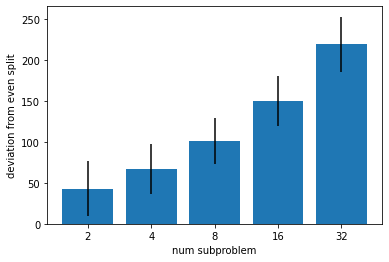

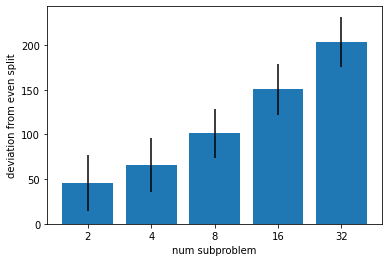

In [42]:
N = 10000

num_trials = 100
max_K_exp = 6
run_trials(N,num_trials, max_K_exp, twochoice=False)
run_trials(N,num_trials, max_K_exp, twochoice=True)


In [34]:
print(two_choice([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1], 3))

[[], [0], []]
[[], [0, 1], []]
[[0], [0, 1], []]
[[0, 1], [0, 1], []]
[[0, 1], [0, 1, 0], []]
[[0, 1], [0, 1, 0, 1], []]
[[0, 1, 0], [0, 1, 0, 1], []]
[[0, 1, 0], [0, 1, 0, 1], [1]]
[[0, 1, 0], [0, 1, 0, 1], [1, 0]]
[[0, 1, 0], [0, 1, 0, 1], [1, 0, 1]]
[[0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
[[0, 1, 0, 1], [0, 1, 0, 1], [1, 0, 1, 0]]
[[0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0]]
[[0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 1]]
[[0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0]]
[[0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0]]
[[0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0]]
